# Check SRM application

Here we double check that, if we apply the calculated SRM, we do get a 1.5C-like trajectory. This won't be perfect, as the assumed carbon cycle feedbacks in the original derivation won't match the carbon cycle feedbacks in the scenario, so here we are checking that this error is small.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import json
import os
from pathlib import Path

import dotenv
import openscm_runner.adapters
import pymagicc.io
import scmdata

import utils

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/openscm_runner/progress.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<IPython.core.display.Javascript object>

In [3]:
ID = "small_selection"
MEMBER_TO_RUN = 0
# MEMBER_TO_RUN = 5
SCENARIO_TO_RUN = "POLES ADVANCEADVANCE_2030_Price1.5C"
SCENARIO_TO_RUN = "MESSAGEix-GLOBIOM_1.1EN_INDCi2030_2500_COV"
SCENARIO_TO_RUN = "COFFEE 1.1EN_INDCi2030_500f"

<IPython.core.display.Javascript object>

## Load SRM pathways

In [4]:
IN_FILE = Path(utils.DATA_DIR / "interim" / "delta_rf") / f"{ID}_delta-erf_082.csv"

<IPython.core.display.Javascript object>

In [5]:
all_in = scmdata.ScmRun(str(IN_FILE))
all_in

<ScmRun (timeseries: 352800, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        2100_warming  SRM_years      TCRE  \
	0           2.489039        369       NaN   
	1           2.489039        369       NaN   
	2           2.489039        369  1.950013   
	3           2.147834        210       NaN   
	4           2.147834        210       NaN   
	...              ...        ...       ...   
	352795      1.990864        136       NaN   
	352796      1.990864        136  1.771202   
	352797      3.277802        346       NaN   
	352798      3.277802        346       NaN   
	352799      3.277802        346  1.771202   
	
	        average_cdr_between_peak_and_15_temp climate_model  ensemble_member  \
	0                               10497.094173  MAGICCv7.5.3                0   
	1                               10497.094173  MAGICCv7.5.3                0   
	2                               10497.094173  MAGICCv7.5.3                0   
	3           

<IPython.core.display.Javascript object>

## Config

In [6]:
SCENARIO_INPUT_FILE = Path(
    utils.DATA_DIR / f"interim/ar6-wg3-extended/wg3-timeseries-extended_{ID}.csv"
)
SCENARIO_INPUT_FILE

PosixPath('/data2/ubuntu-znicholls/baur-et-al-srm-commitment/data/interim/ar6-wg3-extended/wg3-timeseries-extended_small_selection.csv')

<IPython.core.display.Javascript object>

## Setup

In [7]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [8]:
openscm_runner.adapters.MAGICC7.get_version()

'v7.5.3'

<IPython.core.display.Javascript object>

### Load probabilistic distribution

In [9]:
with open(os.environ["MAGICC_AR6_PROBABILISTIC_DISTRIBUTION"]) as f:
    prob_dist = json.load(f)

display(prob_dist["description"])
cfgs_to_run = [
    {
        **{k.lower(): v for k, v in cfg["nml_allcfgs"].items()},
        "runname": str(cfg["paraset_id"]),
    }
    for cfg in prob_dist["configurations"]
    if cfg["paraset_id"] in [MEMBER_TO_RUN]
]
assert len(cfgs_to_run) == 1, "Missing expected members..."
len(cfgs_to_run)

'IPCC AR6 config drawn on 9th Feb 2021. Sub-sample set 0fd0f62 from derived metrics set f023edb. Drawn in 532_plot_and_save_subsampled_distribution.ipynb.'

1

<IPython.core.display.Javascript object>

## Common configs

Configuration to apply to all runs (should match original run setup...)

In [10]:
common_cfgs = {
    "startyear": 1750,
    "endyear": 2500,
    "out_dynamic_vars": [  ### determines which variables are outputted (could also set in MAGCFG_DEFAUKTAKK.CFG OUT-TEMPERATURE=1 instead)
        "DAT_SURFACE_TEMP",
        #         "DAT_TOTAL_INCLVOLCANIC_ERF",
    ],
    "out_ascii_binary": "BINARY",
    "out_binary_format": 2,
}
common_cfgs

{'startyear': 1750,
 'endyear': 2500,
 'out_dynamic_vars': ['DAT_SURFACE_TEMP'],
 'out_ascii_binary': 'BINARY',
 'out_binary_format': 2}

<IPython.core.display.Javascript object>

In [11]:
overrides = {
    "RF_SOLAR_SCALE".lower(): 0,
}

<IPython.core.display.Javascript object>

In [12]:
# might want more in here
openscm_runner_output_names = [
    "Surface Temperature",
]
openscm_runner_output_names

['Surface Temperature']

<IPython.core.display.Javascript object>

### Load scenarios

In [13]:
scenarios = scmdata.ScmRun(str(SCENARIO_INPUT_FILE))

<IPython.core.display.Javascript object>

In [14]:
scenarios_clean = utils.clean_scenarios(scenarios.filter(ms=SCENARIO_TO_RUN))
scenarios_clean

<ScmRun (timeseries: 52, timepoints: 486)>
Time:
	Start: 2015-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	         max_CDR       model                           ms region  \
	0  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	1  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	2  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	3  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	4  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	5  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	6  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	7  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	8  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	9  -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	10 -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  World   
	11 -27741.617085  COFFEE 1.1  COFFEE 1.1EN_INDCi2030_500f  Wor

<IPython.core.display.Javascript object>

## Write SRM file

In [15]:
extra_rf_file = os.path.join(
    os.path.dirname(os.environ["MAGICC_EXECUTABLE_7"]),
    "..",
    "run",
    "15_SRM-ERF_trajectories_check",
    f"{MEMBER_TO_RUN}_{SCENARIO_TO_RUN.replace(' ', '').replace('.', '')}_EXTRA_RF.IN",
)
os.makedirs(os.path.dirname(extra_rf_file), exist_ok=True)
extra_rf_file

'/data2/ubuntu-znicholls/baur-et-al-srm-commitment/magicc-bits-and-pieces/magicc-v7.5.3/bin/../run/15_SRM-ERF_trajectories_check/0_COFFEE11EN_INDCi2030_500f_EXTRA_RF.IN'

<IPython.core.display.Javascript object>

In [16]:
def write_qextra_file(forcing, out_file):
    forcing = pymagicc.io.MAGICCData(forcing)
    forcing["variable"] = "Radiative Forcing|Extra"
    forcing["todo"] = "SET"
    forcing.metadata["header"] = "Prescribed forcing file"

    forcing.write(out_file, magicc_version=7)


<IPython.core.display.Javascript object>

In [17]:
write_qextra_file(
    all_in.filter(
        variable="delta_rf", ms=SCENARIO_TO_RUN, ensemble_member=MEMBER_TO_RUN
    ).timeseries(time_axis="year")
    * -1,
    extra_rf_file,
)

<IPython.core.display.Javascript object>

## Run

In [18]:
## concat all configs together
run_cfg = [
    {
        **common_cfgs,
        **c,
        **overrides,
        "RF_EXTRA_READ".lower(): 1,
        "FILE_EXTRA_RF": extra_rf_file,
    }
    for c in cfgs_to_run
]

res_raw = openscm_runner.run(
    {"MAGICC7": run_cfg},
    scenarios_clean,
    output_variables=openscm_runner_output_names,
    out_config={"MAGICC7": ("runname",)},
)
res_raw["ensemble_member"] = res_raw["runname"]
res_raw = res_raw.drop_meta("runname")

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Historical data has not been checked
/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/openscm_units/_unit_registry.py:471: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, val in metric_conversion.iteritems():


Writing SCEN7 files:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Front serial:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Front parallel: 0.00it [00:00, ?it/s]

Parallel runs: 0.00it [00:00, ?it/s]

<IPython.core.display.Javascript object>

In [19]:
res_raw.filter(region="World").timeseries().max(axis=1)

climate_model  ensemble_member  model       region  run_id  scenario           unit  variable                      
MAGICCv7.5.3   0                COFFEE 1.1  World   0       EN_INDCi2030_500f  K     Surface Air Temperature Change    1.80201
dtype: float64

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(data=plt_df, **kwargs)


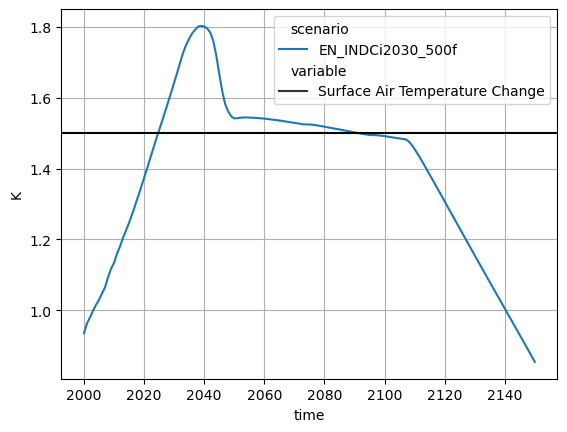

<IPython.core.display.Javascript object>

In [20]:
ax = res_raw.filter(region="World", year=range(2000, 2150 + 1)).lineplot(
    style="variable"
)
ax.axhline(1.5, color="k")
ax.grid()